In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./muonLoss/data/gm2offline_full.root")
f.cd("t0Analyzer")
f.ls()
t = f.Get("t0Analyzer/t0Tree")
t.Print()

TFile**		./muonLoss/data/gm2offline_full.root	
 TFile*		./muonLoss/data/gm2offline_full.root	
  TDirectoryFile*		t0Analyzer	t0Analyzer (T0PulseProcessorAnalyzer) folder
   KEY: TTree	t0Tree;1	t0Tree
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation
******************************************************************************
*Tree    :t0Tree    : t0Tree                                                 *
*Entries :      120 : Total =        29181140 bytes  File  Size =    8569846 *
*        :          : Tree compression factor =   3.40                       *
*******************************

Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSRawArtRecord is available
Warning in <TClass::Init>: no dictionary for class gm2aux::IBMSBeamProfileArtRecord is available


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h (Potential memory leak).


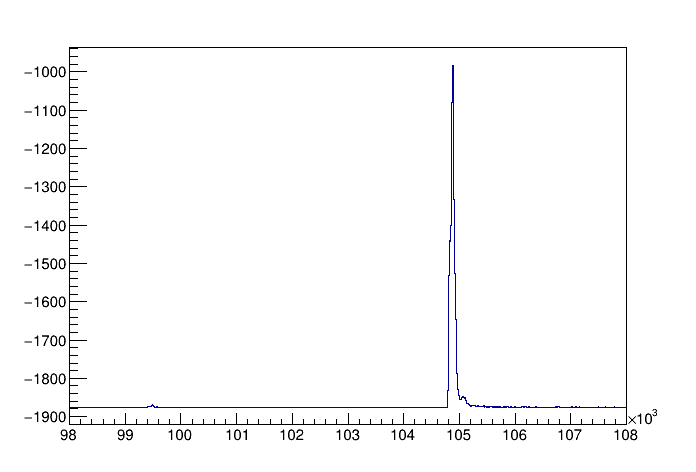

In [46]:
c = r.TCanvas()
h = r.TH2D("h","",1000,98000,108000,200,-2000,0)
t.Draw("tracetubeA:sampleNums>>h","pulseIndex == 1","colz")
h2 = h.ProfileX().Clone("h2")
h2.Draw("hist")
c.Draw()

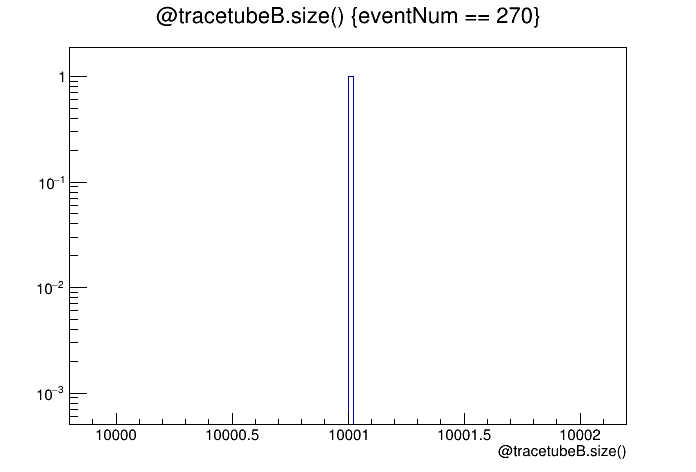

In [5]:
c = r.TCanvas()
t.Draw("@tracetubeB.size()","eventNum == 270","")
c.SetLogy()
c.Draw()

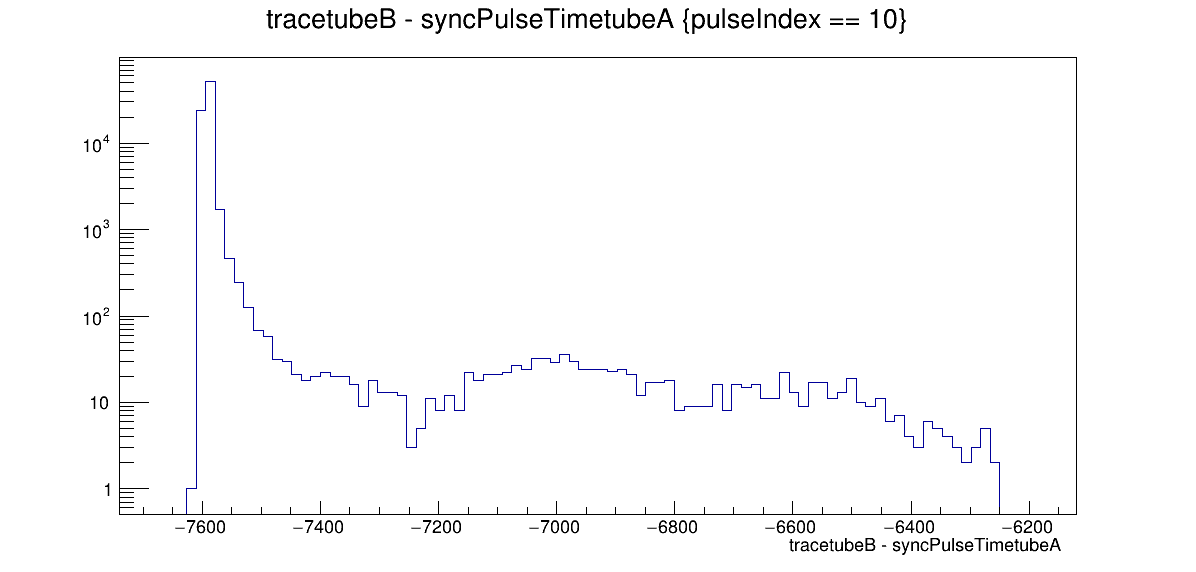

In [6]:
c = r.TCanvas("c","c",1200,600)
t.Draw("tracetubeB - syncPulseTimetubeA","pulseIndex == 10","")
c.SetLogy()
c.Draw()

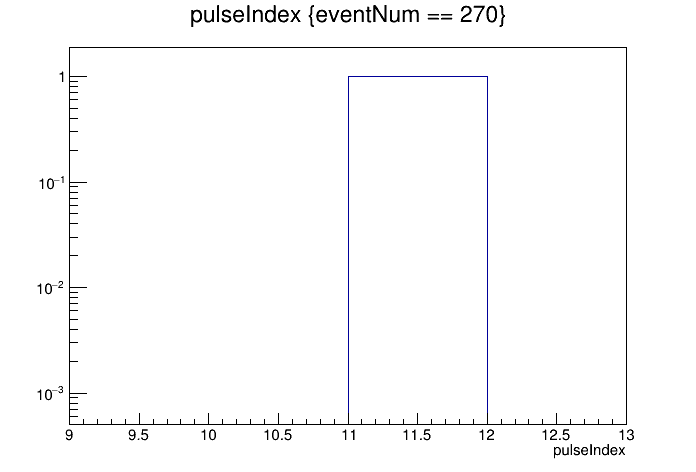

In [7]:
c = r.TCanvas()
t.Draw("pulseIndex","eventNum == 270","")
c.SetLogy()
c.Draw()

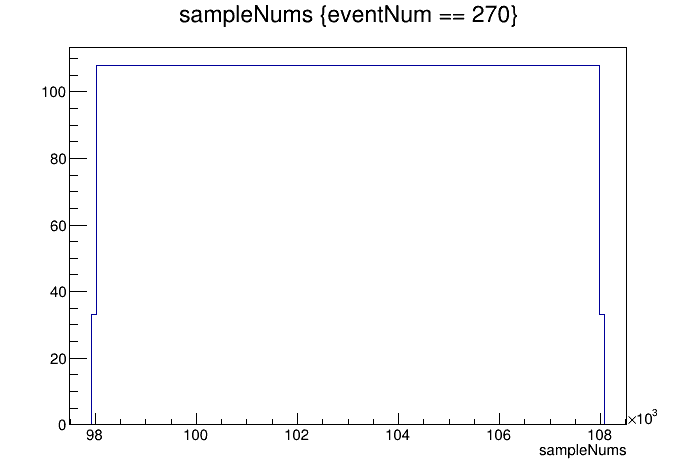

In [8]:
c = r.TCanvas()
t.Draw("sampleNums","eventNum == 270","")
#c.SetLogy()
c.Draw()

In [15]:
def plotT0Traces(t, ax, combineTraces = False, rangeAroundMaximum = 500):
    if combineTraces:
        nsamples = t.Draw("sampleNums:tracetubeA","","goff")
        samples = list(t.sampleNums[:-1])
        tubeA = list(t.tracetubeA)
        maxIndex = tubeA.index(max(tubeA))
        xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
        ding = ax.plot(samples, tubeA)
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_title("All Bunches")
        return (samples, tubeA)
    else:
        allSamples = []
        allTubeA = []
        for bunch in range(16):
            nsamples = t.Draw("sampleNums:tracetubeA","pulseIndex == "+str(bunch),"goff")
            samples = []
            tubeA = []
            for i in range(nsamples):
                samples.append(t.GetV1()[i])
                tubeA.append(t.GetV2()[i])
            #tubeAHist = []
            #for i, x in enumerate(tubeA):
            #    tubeAHist.append([x for i in range(x)])
            #samples = list(t.sampleNums[:-1])
            #tubeA = list(t.tracetubeA)
            
            
            #take average of this bunch
            avgSamples = []
            avgTubeA = []
            for i, x in enumerate(samples):
                if(x not in avgSamples):
                    #print(i, x)
                    indices = [j for j, y in enumerate(samples) if y == x]
                    ding = [tubeA[j] for j in indices]
                    avgSamples.append(x)
                    avgTubeA.append(np.mean(ding))
            
            allSamples.append(avgSamples)
            allTubeA.append(avgTubeA)
            
            if(len(ax) == 16):
                #ax[bunch].plot(samples, tubeA)
                ax[bunch].plot(avgSamples, avgTubeA)
                ax[bunch].set_title("Bunch "+str(bunch))
                maxIndex = tubeA.index(max(tubeA))
                xlims = [samples[maxIndex - rangeAroundMaximum], samples[maxIndex + rangeAroundMaximum]]
                ax[bunch].set_xlim(xlims[0], xlims[1])
            else:
                print("Error: axis length is not 16. Not drawing")
        return (allSamples, allTubeA)

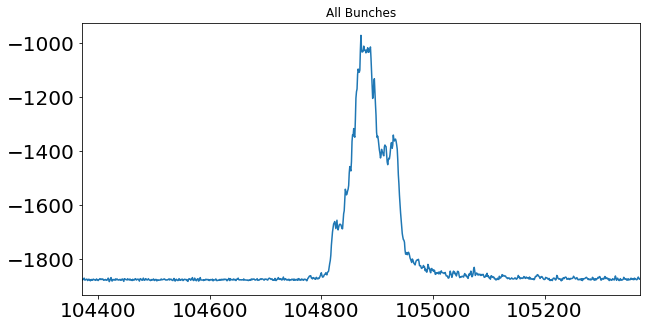

In [10]:
fig, ax = plt.subplots(figsize=(10,5),sharex=True, sharey=True)
plotT0Traces(t, ax, True)
plt.show()

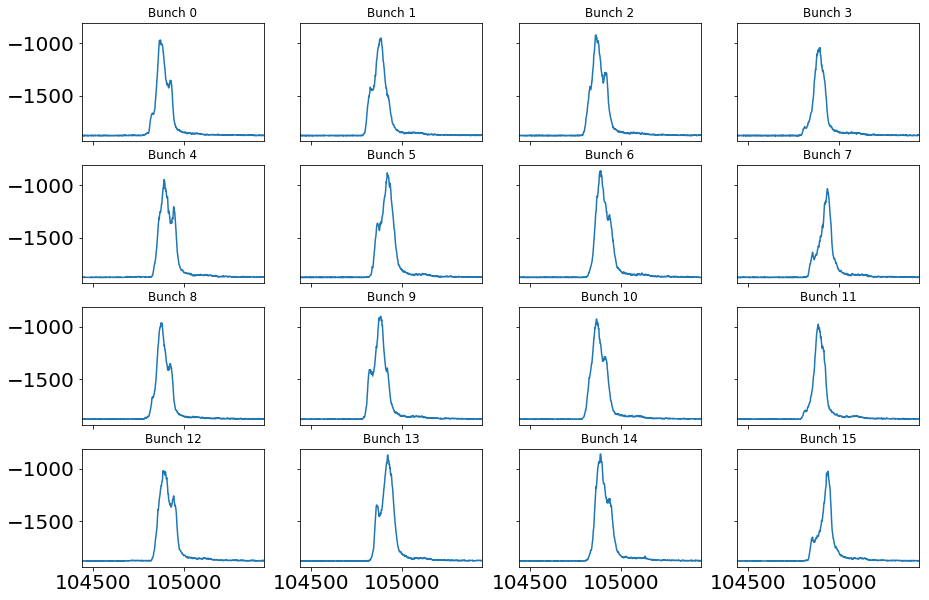

In [16]:
fig, axs = plt.subplots(4,4,figsize=(15,10),sharex=True, sharey=True)
ax = flatten2dArray(axs)
ding = plotT0Traces(t, ax, False, 300)
plt.show()

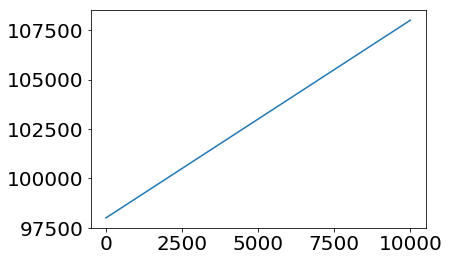

In [17]:
plt.plot(ding[0][1])

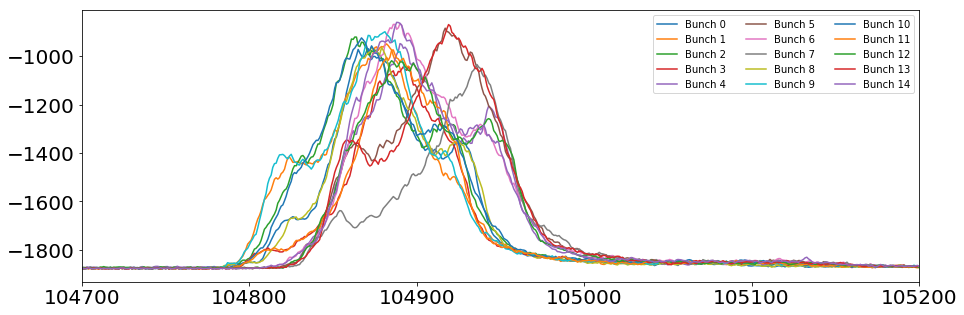

In [35]:
fig,ax = plt.subplots(figsize=(15,5))
for i in range(15):
    plt.plot(ding[0][i],ding[1][i],label="Bunch "+str(i))
#plt.xlim(6500,7500)
plt.xlim(104700,105200)
plt.legend(ncol=3)
plt.show()